## Overhearing population
### https://iopscience.iop.org/article/10.1209/0295-5075/101/68004/meta
### https://langev.com/pdf/0bqCwMtiFdoJ.pdf

### 1. basic speaker-hearer rules

In [1]:
## basic speaker-hearer rules

import random

## s is one node of P (population-graph)
## M is the dictionary of memories {node:memory list of node}
## V is a predefined vocabulary
def speaker_rule(s,M,V):
    ## the speaker s selects one word w from her inventory
    if len(M[s])==0:
        w = random.choice(V)
        M[s]+=[w]
    else:
        w = random.choice(M[s])
    return w

## h is one node of P (population-graph)
## word is the word uttered by the speaker
## M is the dictionary of memories {node:memory list of node}
def hearer_rule(h,word,M):
    ## the hearer receives word 
    success = False
    if word in M[h]:
        success = True
    return success

### 2. dynamics

In [2]:
## s is one node of P (population-graph)
## h is one node of P (population-graph)
## word is speaker's word
## M is the dictionary of memories {node:memory list of node}
## V is a predefined vocabulary

def dynamics(s,h,word,M,V):
    ## hearer's state
    success = hearer_rule(h,word,M)
    ## alignment strategies
    if success == True:
        M[s]=[word]
        M[h]=[word]
    else:
        M[h]+=[word]
    return M  

In [3]:
## some measures

def measure_number_words(M):
    join_M = [item for item in M.values()]
    join_M = [item for sublist in join_M for item in sublist]
    return [len(join_M),len(set(join_M))]

In [10]:
import networkx as nx

T = 10000
number_nodes = 1000
## the simplest version!
P = nx.complete_graph(number_nodes)
number_words = 10
V = range(number_words)
M = {node:[] for node in P.nodes()}
percentage_over = 0.01
number = []

for t in range(T):
    
    number+=[measure_number_words(M)]
    ## speaker
    others = list(P.nodes())
    speaker = random.choice(others)
    ## hearer!=speaker!
    others.pop(speaker)
    hearer_central = random.choice(others)
    ## overhearers (percentage of the neighbors of the speaker)
    overhearers = random.sample(list(dict(P[speaker]).keys()),int(percentage_over*len(P[speaker])))
    ## one overhearer to interact with the speaker
    word = speaker_rule(speaker,M,V)
    ## speaker-hearer interaction!
    M = dynamics(speaker,hearer_central,word,M,V)
    for hearer in overhearers:
        success = hearer_rule(hearer,word,M)
        if success == True:
            M[hearer]=[word]
        else:
            M[hearer]+=[word]     

In [11]:
numberW = list(zip(*number))[0]
numberD = list(zip(*number))[1]

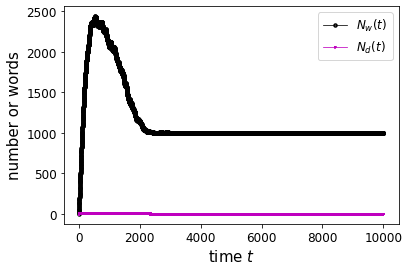

In [12]:
import matplotlib.pyplot as plt

plt.plot(range(T), numberW,color='k',linewidth=0.75,marker='o',markersize=3,fillstyle='none',markeredgewidth=1.5,clip_on=False,label=r'$N_w(t)$')
plt.plot(range(T), numberD,color='m',linewidth=0.75,marker='+',markersize=3,fillstyle='none',markeredgewidth=1.5,clip_on=False,label=r'$N_d(t)$')

plt.ticklabel_format(axis='x', style='sci',scilimits=(0,5))
plt.legend(loc='best')
plt.ylabel('number or words',fontsize=15)
plt.xlabel('time $t$',fontsize=15)
plt.rcParams.update({'font.size': 12})
plt.savefig('words.pdf', format='pdf', transparent=True, bbox_inches='tight',dpi=800)
plt.show()